# Import of the required libraries

In [310]:
import pandas as pd
import numpy as np
import math
import missingno as msno

### Import of dataset

In [313]:
df_houses = pd.read_csv("data/King_County_House_prices_dataset.csv")


### Import Population density per zip code

In [315]:
df_density = pd.read_csv("data/density_kc.csv", delimiter=";")

df_density["population"].astype('int')
df_density.replace("ZIP", "zipcode")
df_density.info()
df_density.max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   zipcode             77 non-null     int64  
 1   population_density  77 non-null     float64
 2   population          77 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.9 KB


zipcode               98288.0
population_density    20629.5
population            60920.0
dtype: float64

In [ ]:
# Enrich the dataset with the density

In [250]:
df_density_combine = pd.merge(df_houses, df_density, on=["zipcode"])
df_density_combine

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,population_density▼,Zip;Population,population
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,4066.5,98178;23866,23866
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,1945,0.0,98178,47.5009,-122.248,1190,6780,4066.5,98178;23866,23866
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,1967,0.0,98178,47.5091,-122.244,2660,8712,4066.5,98178;23866,23866
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,1961,NaN,98178,47.5053,-122.255,1320,7619,4066.5,98178;23866,23866
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,1931,0.0,98178,47.5048,-122.272,1650,8775,4066.5,98178;23866,23866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20092,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,0.0,0.0,...,1989,NaN,98039,47.6177,-122.229,3450,16087,536.6,98039;3080,3080
20093,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,0.0,0.0,...,1987,0.0,98039,47.6209,-122.237,3070,18713,536.6,98039;3080,3080
20094,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,0.0,...,2006,0.0,98039,47.6295,-122.236,3410,16236,536.6,98039;3080,3080
20095,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,0.0,1.0,...,2013,0.0,98039,47.6102,-122.225,3840,19250,536.6,98039;3080,3080


In [254]:
# Assumption: If a yr_renovated is not available, the last know date of doing something on the house is its building, so we replace NaN and 0.0 values
df_density_empty_yr = df_density_combine[df_density_combine["yr_renovated"]==0]
df_density_empty_yr


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,population_density▼,Zip;Population,population
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,4066.5,98178;23866,23866
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,1945,0.0,98178,47.5009,-122.248,1190,6780,4066.5,98178;23866,23866
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,1967,0.0,98178,47.5091,-122.244,2660,8712,4066.5,98178;23866,23866
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,1931,0.0,98178,47.5048,-122.272,1650,8775,4066.5,98178;23866,23866
5,4268200055,5/1/2015,245000.0,3,1.75,1740,11547,1.0,0.0,0.0,...,1954,0.0,98178,47.4945,-122.220,880,78408,4066.5,98178;23866,23866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20088,2525049263,7/9/2014,2680000.0,5,3.00,4290,20445,2.0,NaN,0.0,...,1985,0.0,98039,47.6217,-122.239,3620,22325,536.6,98039;3080,3080
20091,3625049042,10/11/2014,3640000.0,5,6.00,5490,19897,2.0,0.0,0.0,...,2005,0.0,98039,47.6165,-122.236,2910,17600,536.6,98039;3080,3080
20093,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,0.0,0.0,...,1987,0.0,98039,47.6209,-122.237,3070,18713,536.6,98039;3080,3080
20094,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,0.0,...,2006,0.0,98039,47.6295,-122.236,3410,16236,536.6,98039;3080,3080


In [260]:
df_density_combine2 = df_density_combine.eval("price_sqm = price / sqft_living").round(2)
df_density_combine2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,population_density▼,Zip;Population,population,price_sqm
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,98178,47.51,-122.26,1340,5650,4066.5,98178;23866,23866,188.05
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,0.0,98178,47.50,-122.25,1190,6780,4066.5,98178;23866,23866,233.44
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,0.0,98178,47.51,-122.24,2660,8712,4066.5,98178;23866,23866,211.90
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,NaN,98178,47.51,-122.26,1320,7619,4066.5,98178;23866,23866,181.54
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,0.0,98178,47.50,-122.27,1650,8775,4066.5,98178;23866,23866,197.67


In [309]:
df_density_combine4 = df_density_combine2[df_density_combine2["yr_renovated"]<=0]
df_density_combine5 = df_density_combine4[df_density_combine2["yr_renovated"].]
df_density_combine5


AttributeError: 'Series' object has no attribute 'isNaN'

In [301]:

df_density_combine4.loc[0:20095,"yr_renovated"] = df_density_combine4.loc[0:20095,"yr_built"]
df_density_combine4.head()

/Users/levaldo/neuefische/ds-seattle-housemarket/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,population_density▼,Zip;Population,population,price_sqm
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,98178,47.51,-122.26,1340,5650,4066.5,98178;23866,23866,188.05
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,1945,98178,47.50,-122.25,1190,6780,4066.5,98178;23866,23866,233.44
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,1967,98178,47.51,-122.24,2660,8712,4066.5,98178;23866,23866,211.90
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,1931,98178,47.50,-122.27,1650,8775,4066.5,98178;23866,23866,197.67
5,4268200055,5/1/2015,245000.0,3,1.75,1740,11547,1.0,0.0,0.0,...,1954,98178,47.49,-122.22,880,78408,4066.5,98178;23866,23866,140.80


In [277]:
df_density_combine3 = df_density_combine2.groupby("zipcode").mean().round(2)
#df_density_combine3.price.mean().round(2)
df_density_combine3.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,population_density▼,population,price_sqm
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,4.651274e+09,281194.87,3.39,2.01,1903.78,14967.00,1.43,0.0,0.09,3.34,...,1723.76,1980.87,28.04,47.31,-122.27,1830.10,11218.88,1678.8,31742.0,151.35
98002,4.850894e+09,234284.04,3.33,1.84,1627.74,7517.63,1.33,0.0,0.01,3.74,...,1522.54,1967.77,60.21,47.31,-122.21,1479.03,7585.48,4699.8,34240.0,151.17
98003,4.674182e+09,294111.28,3.36,2.05,1928.88,10603.10,1.31,0.0,0.21,3.37,...,1663.55,1976.89,16.64,47.32,-122.31,1876.20,9746.18,3890.6,45632.0,157.11
98004,4.394237e+09,1356523.99,3.85,2.53,2909.02,13104.22,1.43,0.0,0.31,3.50,...,2419.84,1971.47,213.76,47.62,-122.21,2674.70,12805.02,3617.2,31254.0,475.61
98005,4.961872e+09,810289.70,3.85,2.42,2656.80,19928.79,1.28,0.0,0.10,3.70,...,2160.20,1969.74,57.99,47.61,-122.17,2567.86,18367.77,2381.2,17880.0,314.97


<AxesSubplot:xlabel='bedrooms', ylabel='price_sqm'>

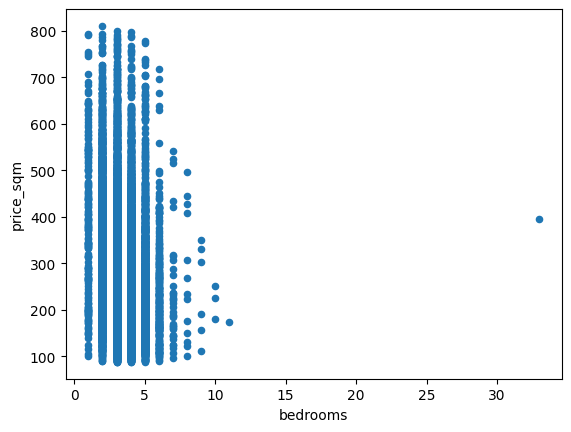

In [280]:
df_density_combine2.plot(kind="scatter", x="bedrooms", y = "price_sqm")

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

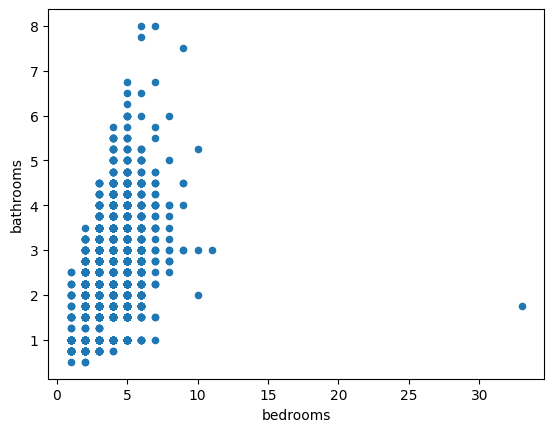

In [281]:
df_density_combine2.plot(kind="scatter", x="bedrooms", y = "bathrooms")

<AxesSubplot:xlabel='condition', ylabel='price_sqm'>

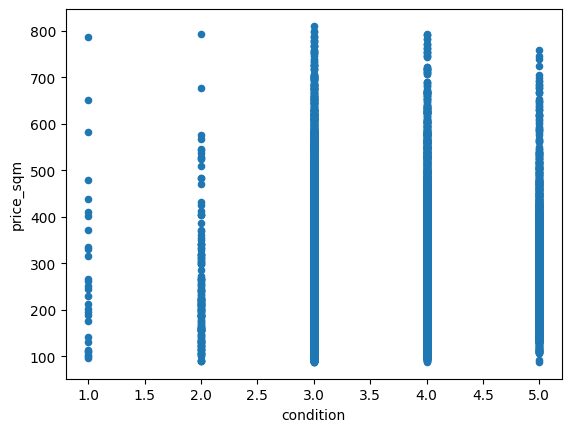

In [282]:
df_density_combine2.plot(kind="scatter", x="condition", y = "price_sqm")

# Hypotheses

1. House prises vary by sqft, therefore the price/sqft is a better measure
1. The house price is depending on the area
1. Checking if prices differs by ZIP-codes 
1. Do the age and codition of houses in the area / zip code correlate to the prices
1. Are the waterfront and view a positive factors?
1. how do the 15 next flats influence the house price?
1. The number of Bed- and bathrooms influences the price

# Checking the dataset

At the beginning it is recommended to check the shape of the dataset with `.shape`, `head()` and `info()` to get an overview of the different columns. The I will check the datatypes of the different columns and if they are suitable for further processing. Otherwise they have to be converted to a more suitable datatype.

In [132]:
df_houses.shape

(21597, 21)

the dataset has 21597 lines and 21 columns.

In [191]:
df_houses.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [134]:
df_houses.mean()

/var/folders/xs/8w8m5gsj27zfjpmyh0rh_mbm0000gn/T/ipykernel_26112/1935214637.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_houses.mean()


id               4.580474e+09
price            5.402966e+05
bedrooms         3.373200e+00
bathrooms        2.115826e+00
sqft_living      2.080322e+03
sqft_lot         1.509941e+04
floors           1.494096e+00
waterfront       7.595859e-03
view             2.338627e-01
condition        3.409825e+00
grade            7.657915e+00
sqft_above       1.788597e+03
yr_built         1.971000e+03
yr_renovated     8.363678e+01
zipcode          9.807795e+04
lat              4.756009e+01
long            -1.222140e+02
sqft_living15    1.986620e+03
sqft_lot15       1.275828e+04
dtype: float64

In [139]:
df_houses2 = df_houses.groupby("zipcode")
df_houses2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,3625049014,8/29/2014,2950000.0,4,3.50,4860,23885,2.0,0.0,0.0,...,12,4860,0.0,1996,0.0,98039,47.6172,-122.230,3580,16054
3757,2540700110,2/12/2015,1910000.0,4,3.50,4210,18564,2.0,0.0,0.0,...,11,4210,0.0,2001,0.0,98039,47.6206,-122.225,3520,18564
4073,3262300940,11/7/2014,875000.0,3,1.00,1220,8119,1.0,0.0,0.0,...,7,1220,0.0,1955,NaN,98039,47.6328,-122.236,1910,8119
4074,3262300940,2/10/2015,940000.0,3,1.00,1220,8119,1.0,0.0,0.0,...,7,1220,0.0,1955,NaN,98039,47.6328,-122.236,1910,8119


In [86]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

The datatype of `date`is an object, that is not suitable for calculation. Therefore we go deeper into the analysis and find out that it's a string. It should be converted to a datetime, that can be used for calulations. As well the column `sqft_basement`should be converted to an integer.

In [85]:
# check the data type of the first entry
type(df_houses["date"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
# change the datatype of "date" to datetime
df_houses["date"] = pd.to_datetime(df_houses["date"], format = "%m/%d/%Y")

In [71]:
df_houses["sqft_basement"].sort_values(ascending=False)

1127     990.0
8557     990.0
18332    990.0
6571     990.0
12268    990.0
         ...  
21442      NaN
21447      NaN
21473      NaN
21519      NaN
21581      NaN
Name: sqft_basement, Length: 21597, dtype: object

In [100]:
type(df_houses["sqft_basement"][0])

str

In [311]:
df_houses1 = pd.to_numeric(df_houses["sqft_basement"], downcast="integer")
type(df_houses1)

ValueError: Unable to parse string "?" at position 6

In [316]:
#df.info()
df_houses["sqft_basement"] = df_houses.sqft_basement.replace("?", np.NaN)
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [312]:
df_density_combine4.isna().sum()

id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront             1729
view                     45
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
population_density▼       0
Zip;Population            0
population                0
price_sqm                 0
dtype: int64

Furthermore it is interesting to investigate the number of duplicate rows, to drop the duplicates from the dataset. 
> In this data is no duplicate.

In [22]:
df.duplicated().value_counts()

False    21597
dtype: int64

# Checking the values

In [219]:
# Checking the values
df_houses.round({"price": 2, "view":0})
df_houses.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [207]:
#df1=df_houses.query["prices"] < 5000000

In [144]:
df_houses["price"].mean()

540296.5735055795

In [143]:
df_houses["price"].median()

450000.0

In [142]:
df_houses["price"].max()

7700000.0

In [141]:
df_houses["price"].std()

367368.1401013945

In [93]:
df_houses["price"].min()

78000.0

In [208]:
df2 = df_houses.groupby("zipcode")
df2


# Feature Engineering
Enrich the dataset with new columns to get new insights

In [140]:
# price per sqm
df_houses.assign("price_per_sqm") = price/sqft_living

SyntaxError: cannot assign to function call (3345758839.py, line 2)

In [204]:
df_import['sold_year'] = df_import['date'].dt.year
df_import['sold_month'] = df_import['date'].dt.month
df_import['sold_day'] = df_import['date'].dt.dayofweek

NameError: name 'df_import' is not defined

In [206]:
df.date.dt.year

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: date, Length: 21597, dtype: int64

In [202]:
# den Monat aus dem Datum auslesen
df.date.dt.month

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: date, Length: 21597, dtype: int64

In [220]:
pd.pivot_table(df_houses, values="price", index="zipcode", columns="bedrooms", aggfunc=np.mean).round(2)


bedrooms,1,2,3,4,5,6,7,8,9,10,11,33
zipcode,,,,,,,,,,,,
98001,169333.33,217795.45,256070.25,325339.63,318516.17,230000.00,NaN,NaN,NaN,NaN,NaN,NaN
98002,116500.00,187162.37,224578.66,261097.79,270600.00,317750.00,NaN,NaN,NaN,NaN,NaN,NaN
98003,360000.00,215893.53,265377.25,344253.90,428175.00,350500.00,NaN,NaN,NaN,NaN,NaN,NaN
98004,NaN,810964.29,1014536.88,1423202.35,1866421.88,1225000.00,2300000.0,1900000.0,NaN,1150000.0,NaN,NaN
98005,NaN,780000.00,692846.12,865872.05,880322.00,967500.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
98177,319000.00,487091.43,651097.81,698378.75,954092.11,1085900.00,NaN,NaN,NaN,NaN,NaN,NaN
98178,231000.00,258322.61,274831.35,366566.35,383477.25,455333.33,NaN,NaN,NaN,NaN,NaN,NaN
98188,NaN,231616.67,260233.57,329309.09,348768.18,383700.00,NaN,NaN,NaN,NaN,NaN,NaN
